# Analisando tweets publicados com a hashtag #VotoImpressoEm2022

Este projeto utiliza Python para coletar, tratar e analisar os 1000 tweets mais recentes publicados com a hashtag #VotoImpressoEm2022.

## Coletando os tweets
A coleta dos tweets é realizada com a biblioteca Tweepy, que acessa a API do Twitter. 
Para utilizar a Tweepy, é necessário ter uma [conta de desenvolvedor no Twitter](https://developer.twitter.com/en). Uma vez que a sua conta de desenvolvedor seja aprovada, é necessário obter as chaves de acesso à API.  
  
A requisição foi feita utilizando #VotoImpressoEm2022 como palavra chave. Inicialmente, foram buscado apenas os últimos 100 tweets, mas, para ter resultados mais interessantes nas análises, optou-se por trabalhar com 1000 tweets.

In [185]:
import tweepy

# Credenciais de acesso à API do Twitter
CONSUMER_KEY = ''
CONSUMER_SECRET = ''
ACCESS_TOKEN = ''
ACCESS_TOKEN_SECRET = ''

# Parâmetros para busca de tweets
search = '#VotoImpressoEm2022'
count = 1000

# Autenticação
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
conToken = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True, retry_count = 5, retry_delay = 10)

# Fazendo requisição à API do Twitter e checando número de tweets retornado
results = [tweet for tweet in tweepy.Cursor(conToken.search, q = search, tweet_mode = 'extended', result_type = 'recent').items(count)]
print(len(results))

1000


Uma vez feita a requisição, é interessante se familiarizar com o tipo de resposta retornada. Para isso, foi utilizada uma função que cria uma visualização amigável de um json.

In [46]:
import json

# Visualizando resposta da API
def jprint(obj):
    # Cria visualização amigável de um objeto json
    text = json.dumps(obj, sort_keys = True, indent = 4)
    print(text)
jprint(results[0]._json)

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sun Jan 24 12:32:47 +0000 2021",
    "display_text_range": [
        17,
        177
    ],
    "entities": {
        "hashtags": [
            {
                "indices": [
                    116,
                    135
                ],
                "text": "VotoImpressoEm2022"
            },
            {
                "indices": [
                    137,
                    150
                ],
                "text": "APauta\u00c9OPovo"
            },
            {
                "indices": [
                    152,
                    177
                ],
                "text": "BolsonaroOrgulhoDoBrasil"
            }
        ],
        "media": [
            {
                "display_url": "pic.twitter.com/ozc6NEQ6Ny",
                "expanded_url": "https://twitter.com/Cb2Por/status/1353319838161240064/video/1",
                "id": 1353319753197232129,
                "id_str": "1353319

## Limpando e estruturando os tweets em um dataframe
Para facilitar as análises, os tweets foram estruturados em um dataframe. Como a requisição retorna muitos dados sobre os tweets, foram escolhidas apenas algumas variáveis principais - nem todas foram utilizadas neste projeto, mas podem ser interessantes para análises futuras.

In [49]:
# Armazenando dados dos tweets em um dataframe
from datetime import datetime
import pandas as pd
import re

def clean_text(full_text):
    # Limpa o texto do tweet, retirando RTs, menções, links e quebras de linha
    clean_text = re.sub(r'RT+', '', full_text) 
    clean_text = re.sub(r'@\S+', '', clean_text)  
    clean_text = re.sub(r'https?\S+', '', clean_text) 
    clean_text = clean_text.replace("\n", " ")
    return clean_text

def all_tweets_to_df(results):
    # Recebe a lista de tweets e armazena em um dataframe com principais variáveis de interesse
    id_list = [tweet.id for tweet  in results]
    data_set = pd.DataFrame(id_list, columns = ['id'])
    data_set['full_text'] = [tweet.full_text for tweet in results]
    data_set['clean_text'] = [clean_text(tweet.full_text) for tweet in results]
    data_set['created_at'] = [tweet.created_at for tweet in results]
    data_set['created_at_day'] = [datetime(tweet.created_at.year, tweet.created_at.month, tweet.created_at.day) for tweet in results]
    data_set['retweet_count'] = [tweet.retweet_count for tweet in results]
    data_set['favorite_count'] = [tweet.favorite_count for tweet in results]
    data_set['user_screen_name'] = [tweet.author.screen_name for tweet in results]
    data_set['user_verified'] = [tweet.author.verified for tweet in results]
    data_set['user_followers_count'] = [tweet.author.followers_count for tweet in results]
    data_set['user_location'] = [tweet.author.location for tweet in results]
    data_set['geo_coordinates'] = [tweet.coordinates for tweet in results]
    data_set['media'] = [tweet.entities.get('media') for tweet in results]
    data_set['user_mentions'] = [tweet.entities.get('user_mentions') for tweet in results]
    data_set['hashtags'] = [tweet.entities.get('hashtags') for tweet in results] 
    return data_set
df_all_tweets = all_tweets_to_df(results)
display(df_all_tweets[0:5])

,id,full_text,clean_text,created_at,created_at_day,retweet_count,favorite_count,user_screen_name,user_verified,user_followers_count,user_location,geo_coordinates,media,user_mentions,hashtags
0,1353319838161240064,@CarlosBolsonaro Hoje é dia de de tomar banho ...,Hoje é dia de de tomar banho de cachoeira e á...,2021-01-24 12:32:47,2021-01-24,0,0,Cb2Por,False,12,Santa Cararina,None,"[{'id': 1353319753197232129, 'id_str': '135331...","[{'screen_name': 'CarlosBolsonaro', 'name': 'C...","[{'text': 'VotoImpressoEm2022', 'indices': [11..."
1,1353314641657663489,@CarlosBolsonaro @govbr @jairbolsonaro Nosso P...,Nosso Presidente Bolsonaro Sempre Foi Vítim...,2021-01-24 12:12:08,2021-01-24,0,0,Cb2Por,False,12,Santa Cararina,None,"[{'id': 1353314636670644225, 'id_str': '135331...","[{'screen_name': 'CarlosBolsonaro', 'name': 'C...","[{'text': 'QueroBolsonaroAte2026', 'indices': ..."
2,1353314429803360257,#VotoImpressoEm2022 https://t.co/HeD32S1sP0,#VotoImpressoEm2022,2021-01-24 12:11:18,2021-01-24,0,1,ElizaArruda,False,73,"Fortaleza, Brasil",None,None,[],"[{'text': 'VotoImpressoEm2022', 'indices': [0,..."
3,1353312419129548802,#VotoImpressoEm2022 https://t.co/7UmgmngwPO,#VotoImpressoEm2022,2021-01-24 12:03:18,2021-01-24,0,1,MauroCesarSeve1,False,34,,None,None,[],"[{'text': 'VotoImpressoEm2022', 'indices': [0,..."
4,1353310842532601856,Mas não precisa de #VotoImpressoEm2022 \nNé @L...,Mas não precisa de #VotoImpressoEm2022 Né d...,2021-01-24 11:57:02,2021-01-24,0,1,pbkareka,False,3112,"Uberlândia, Brasil",None,None,"[{'screen_name': 'LRobertoBarroso', 'name': 'L...","[{'text': 'VotoImpressoEm2022', 'indices': [19..."


## Obtendo os cinco perfis que mais tuitaram com a hashtag
Com os tweets estruturados em um dataframe, pode-se identificar os cinco perfis que mais tuitaram com a hashtag. É interessante notar que os dois perfis que mais tuitaram possuem nomes de usuário muito extensos e com muitos números, o que pode indicar uma maior chance de serem bots.

In [184]:
df_perfis_tweets = df_all_tweets.groupby(['user_screen_name']).id.count()
df_perfis_tweets = df_perfis_tweets.reset_index().rename(columns = {'id': 'tweets_count'})
df_perfis_tweets = df_perfis_tweets.sort_values(['tweets_count'], ascending = False)
display(df_perfis_tweets[0:5])

,user_screen_name,tweets_count
239,RobsonP94564295,141
11,Alexand21936679,84
0,12_rosiane,43
48,Cb2Por,22
408,lwtfallss,17


## Obtendo os cinco perfis que receberam mais curtidas em seus tweets
Para obter os cinco perfis que receberam mais curtidas em seus tweets com a hashtag, os tweets foram agregados por usuário e somou-se a variável 'favorite_count'. Apenas o perfil @RobsonP94564295, que ficou em primeiro na análise anterior, também aparece aqui.

In [51]:
df_perfis_likes =  df_all_tweets.groupby(['user_screen_name']).favorite_count.sum()
df_perfis_likes = df_perfis_likes.reset_index().rename(columns = {'favorite_count': 'favorite_sum'})
df_perfis_likes = df_perfis_likes.sort_values(['favorite_sum'], ascending = False)
display(df_perfis_likes[0:5])

,user_screen_name,favorite_sum
70,ESRNascimento38,147
239,RobsonP94564295,134
432,ojsilva38,51
68,DrSenso,46
213,Osias80,44


## Visualizando a evolução dos tweets no tempo
Os últimos 1000 tweets com a hashtag foram publicados entre 17 e 24 de janeiro de 2021. Conforme indicam a tabela e o gráfico, o pico de tweets ocorreu no dia 21, em que foram publicados 267 tweets com a hashtag.

,created_at_day,tweets_count
0,2021-01-17,21
1,2021-01-18,90
2,2021-01-19,172
3,2021-01-20,142
4,2021-01-21,267
5,2021-01-22,97
6,2021-01-23,159
7,2021-01-24,52


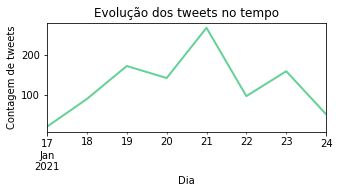

In [86]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, text

# Agregando os tweets
df_tweets_dia =  df_all_tweets.groupby(['created_at_day']).id.count()
df_tweets_dia = df_tweets_dia.reset_index().rename(columns = {'id': 'tweets_count'})
display(df_tweets_dia)

#Gerando o gráfico
ax = df_tweets_dia.plot(kind = 'line',
                  x = 'created_at_day', y = 'tweets_count',
                  title = 'Evolução dos tweets no tempo',
                  linewidth = 2, color = '#63d297', legend = False)
ax.set_ylabel('Contagem de tweets')
ax.set_xlabel('Dia')
plt.rcParams['figure.figsize'] = [5,1]
plt.show()


## Visualização em rede das relações entre os usuários que twitaram com a hashtag
Para visualizar as relações entre os usuários, foi utilizado um grafo, que mostra a frequência das interações entre os perfis que tuitaram com a hashtag. Como se trata de uma análise inicial, foram consideradas como interações apenas menções (@), o que contempla replies e retweets (RTs).
  
O primeiro passo foi criar um dataframe, em que cada linha representa uma interação entre usuários. Em seguida, utilizou-se esse dataframe para gerar um grafo com a biblioteca Networkx.  
  
É interessante notar que os perfis que apareceram na análsie de maior número de curtidas também aparecem em destaque no grafo. Em especial, observa-se os perfis @ESRNascimento38, @RobsonP94564295 e @ojsilva38 protagonizando diferentes círculos de usuários.

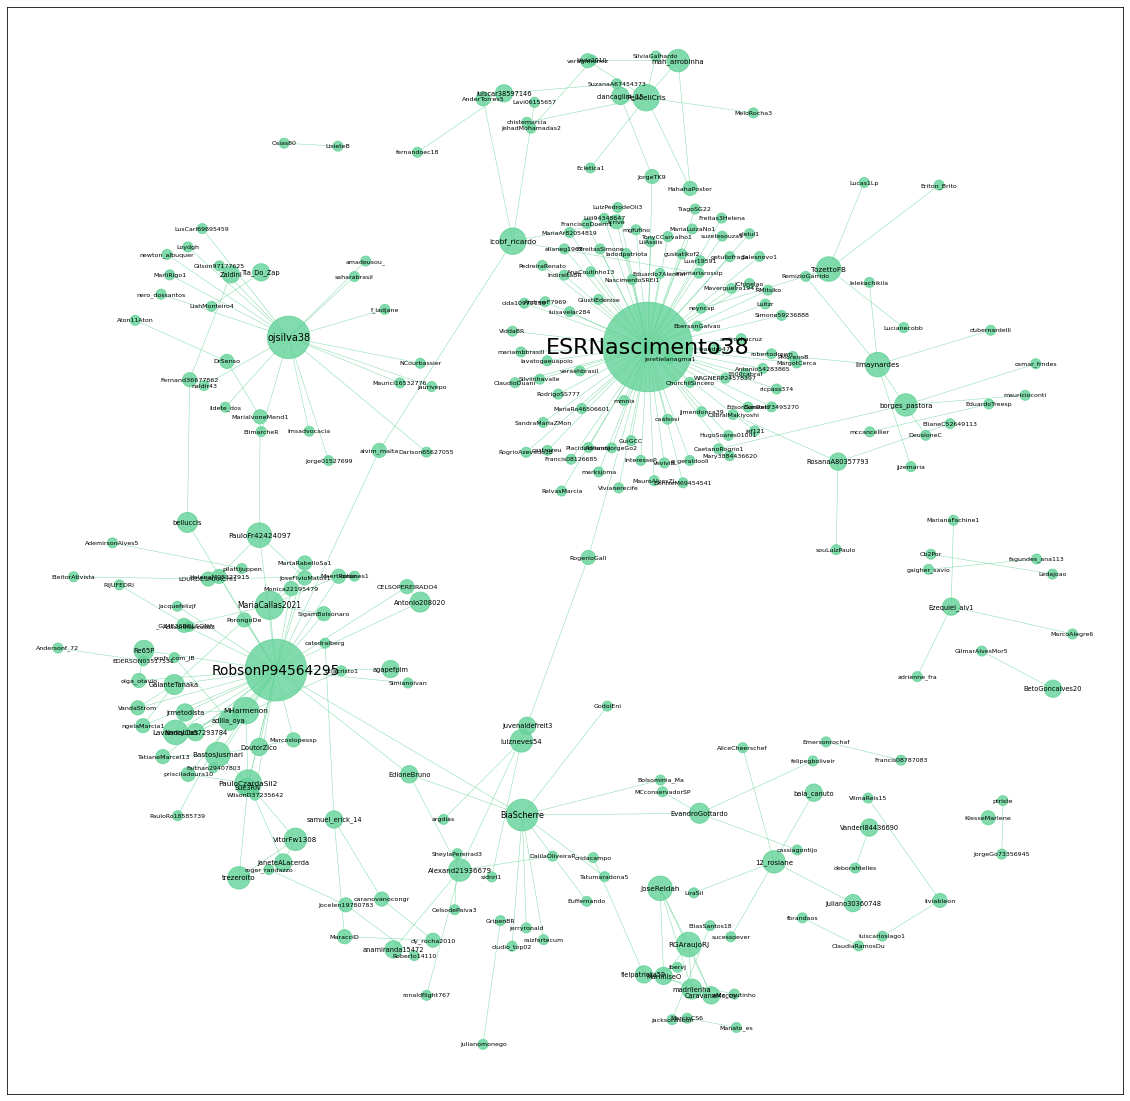

In [180]:
import networkx as nx

def is_interaction(tweet):
    # Dado um tweet, verifica se houve interação com outros usuários. RT's estão contemplados, pois, para dar RT, é preciso mencionar o autor do tweet original
    if len(tweet.entities.get('user_mentions')) != 0:
        return True
    else:
        return False

def is_inside_interaction(mention):
    # Dada uma menção, verifica se o perfil mencionado também tuitou sobre a hashtag
    if mention['screen_name'] in df_all_tweets['user_screen_name'].values:
        return True
    else:
        return False

def interactions_to_df(results):
    # Gera um dataframe com todas as interações verificadas
    data_set = pd.DataFrame(columns = ['id', 'author_screen_name', 'mentioned_screen_name'])
    for tweet in results:
        if is_interaction(tweet):
            for mention in tweet.entities.get('user_mentions'):
                if is_inside_interaction(mention):
                    new_row = {'id': tweet.id,'author_screen_name': tweet.author.screen_name, 'mentioned_screen_name': mention['screen_name']}
                    data_set = data_set.append(new_row, ignore_index = True)
    return data_set

df_inside_interactions = interactions_to_df(results)

def plot_graph(df):
    # Gera uma visualização em rede das interações
    g = nx.from_pandas_edgelist(df_inside_interactions, 'author_screen_name', 'mentioned_screen_name')
    d = dict(g.degree)
    pos = nx.spring_layout(g, k=0.2)
    nx.draw_networkx_nodes(g, pos = pos, node_size =[v * 100 for v in d.values()], alpha = 0.8, node_color = '#63d297')
    nx.draw_networkx_edges(g, pos = pos, width = 0.5, alpha = 0.8, edge_color = '#63d297')
    font_size = {'max': 22, 'min': 6}
    for node, (x, y) in pos.items():
        text(x, y, node, fontsize = (d[node]/(max(d.values()) - min(d.values())) * (font_size['max'] - font_size['min']) + font_size['min']), ha='center', va='center')
    plt.rcParams['figure.figsize'] = [20,20]
    plt.show()
plot_graph(df_inside_interactions)

## Visualização de outras hashtags relacionadas à hashtag inicial
Para encontrar outras hashtags relacionadas à hashtag inicial, foi utilizada uma nuvem de palavras, que mostra uma hierarquia visual das hashtags, de acordo com sua frequência. A nuvem foi gerada com a bibioteca WordCloud.
  
É possível observar uma maior frequência de hashtags em apoio ao presidente Bolsonaro, ao Ministro Ernesto Araújo e à candidatura de Arthur Lira à presidência da Câmara dos Deputados. Por outro lado, há também hashtags em ataque ao governador de SP João Doria e ao atual presidente da Câmara Rodrigo Maia, que é chamado pelo nome 'Botafogo'. É interessante notar também a associação - ainda que menos relevante - com hashtags que, ao contrário da hashtag inicial, não possuem conteúdo político, como #BBB21 e #AFazenda12.

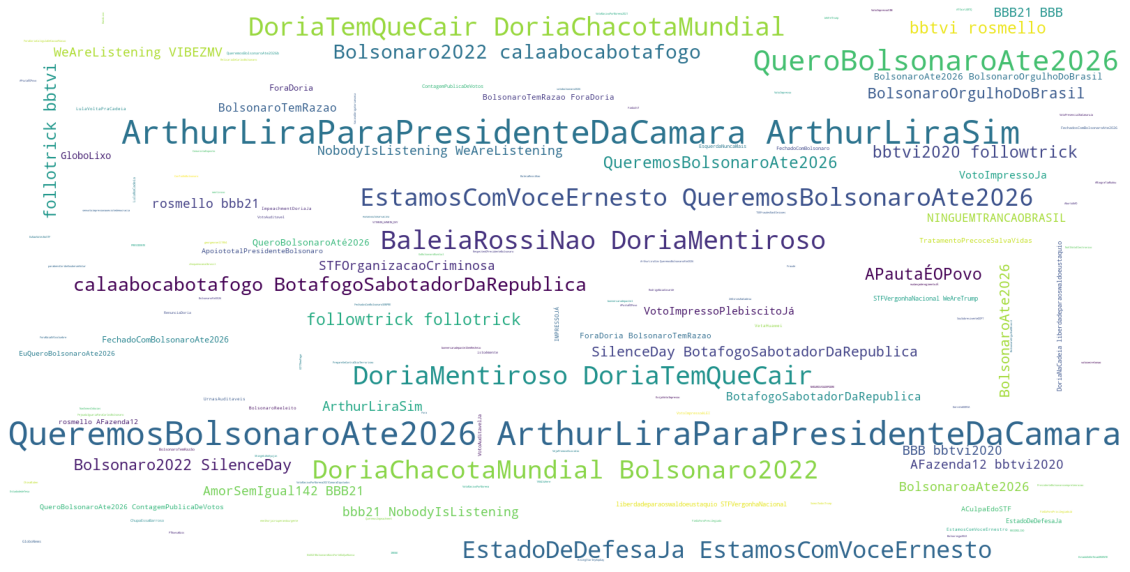

In [89]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def hashtags_to_list(results):
    # Gera uma lista com todas as hashtags mencionadas
    lista = []
    for tweet in results:
        if len(tweet.entities.get('hashtags')) > 0:
            for hashtag in tweet.entities.get('hashtags'):
                lista.append(hashtag['text'])
    return lista

def plot_word_cloud(all_summary):
    # Gera uma nuvem de palavras a partir de uma string
    stopwords = set(STOPWORDS)
    stopwords.update(['VotoImpressoEm2022'])
    wordcloud = WordCloud(stopwords = stopwords, background_color = "white", width = 1600, height = 800).generate(all_summary)
    fig, ax = plt.subplots(figsize=(20,20))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off() 
    plt.imshow(wordcloud)
    plt.show()

hashtags_list = hashtags_to_list(results)
all_summary = ' '.join(hashtags_list)
plot_word_cloud(all_summary)

## Obtendo a probabilidade de ser bot
Para finalizar, foi utilizada a API do [Pegabot](https://pegabot.com.br/) para obter a probabilidade de que os perfis com mais tweets e mais curtidas sejam bots. De forma geral, os perfis com mais tweets apresentaram maior probabilidade de ser bots do que os perfis com mais curtidas. Destaca-se o perfil @Alexand21936679, que tem quase 90% de probabilidade de ser bot.

In [183]:
import requests

def get_bot_probability(user):
    # Dado um usuário, faz uma requisição para a API do Pegabot e obtém a probabilidade de ser um bot
    pegabot_api_url = 'https://api.pegabot.com.br/botometer?socialnetwork=twitter&profile=' + user + '&search_for=profile&limit=1'
    headers = {'content-type': 'application/json'}
    r = requests.get(pegabot_api_url, headers = headers, timeout = None)
    try: 
        user_profiles = r.json()['profiles']
        user_bot_probability = user_profiles[0]['bot_probability']['all']
        return user_bot_probability
    except:
        return 'Sem informação'

df_perfis_tweets_bot_probability = pd.DataFrame(columns = ['user_screen_name', 'bot_probability'])
for user in df_perfis_tweets['user_screen_name'][0:5]:
    new_row = {'user_screen_name': user, 'bot_probability': get_bot_probability(user)}
    df_perfis_tweets_bot_probability = df_perfis_tweets_bot_probability.append(new_row, ignore_index = True)
print("Perfis com mais tweets:")
display(df_perfis_tweets_bot_probability)

df_perfis_likes_bot_probability = pd.DataFrame(columns = ['user_screen_name', 'bot_probability'])
for user in df_perfis_likes['user_screen_name'][0:5]:
    new_row = {'user_screen_name': user, 'bot_probability': get_bot_probability(user)}
    df_perfis_likes_bot_probability = df_perfis_likes_bot_probability.append(new_row, ignore_index = True)
print("Perfis com mais curtidas:")
display(df_perfis_likes_bot_probability)




Perfis com mais tweets:


,user_screen_name,bot_probability
0,RobsonP94564295,0.614721
1,Alexand21936679,0.892446
2,12_rosiane,0.603905
3,Cb2Por,0.61046
4,lwtfallss,Sem informação


Perfis com mais curtidas:


,user_screen_name,bot_probability
0,ESRNascimento38,0.526374
1,RobsonP94564295,0.614721
2,ojsilva38,0.352930
3,DrSenso,0.611750
4,Osias80,0.272864


## Conclusões
Neste projeto, foram analisados os últimos 1000 tweets publicados com a hashtag #VotoImpressoEm2022. Esses tweets ocorreram entre 17 e 24 de janeiro, tendo pico de publicações no dia 21. Entre os cinco usuários que mais tuitaram com a hashtag, todos possuem mais de 60% de chance de serem bots. Já os cinco usuários com mais curtidas em seus tweets possuem menor probabilidade de serem bots. A análise de redes mostrou que esses perfis protagonizam diferentes círculos de usuários que também tuitaram a hashtag.  
  
Ao publicar tweets com #VotoImpressoEm2022, os usuários também incluíram outras hashtags, demonstrando apoio ao presidente Bolsonaro, ao Ministro Ernesto Araújo e ao candidato à presidência da Câmara dos Deputados Arthur Lira. Por outro lado, os usuários também atacaram o governador de SP João Doria e o atual presidente da Câmara Rodrigo Maia. Observaram-se também hashtags como #BBB21 e #AFazenda12, indicando uma estratégia de associar a hashtag a outras populares, mas sem conteúdo político.  
  
Em análises futuras, seria interessante investigar a origem da hashtag e se houve picos de sua publicação relacionados a acontecimentos políticos como a invasão do Capitólio nos EUA ou a retomada da pauta do voto impresso pelo presidente Bolsonaro.
